Dataset shape: (2513, 6)
         ID                                         Resume_str  \
0  16852973           HR ADMINISTRATOR/MARKETING ASSOCIATE\...   
1  22323967           HR SPECIALIST, US HR OPERATIONS      ...   
2  33176873           HR DIRECTOR       Summary      Over 2...   
3  27018550           HR SPECIALIST       Summary    Dedica...   
4  17812897           HR MANAGER         Skill Highlights  ...   

                                         Resume_html Category  word count  \
0  <div class="fontsize fontface vmargins hmargin...       HR       695.0   
1  <div class="fontsize fontface vmargins hmargin...       HR      1008.0   
2  <div class="fontsize fontface vmargins hmargin...       HR       378.0   
3  <div class="fontsize fontface vmargins hmargin...       HR      1204.0   
4  <div class="fontsize fontface vmargins hmargin...       HR       660.0   

   char count  
0      5442.0  
1      5572.0  
2      7720.0  
3      2855.0  
4      9172.0  
<class 'pandas.core

None


Missing values per column:
ID              1
Resume_str      2
Resume_html     6
Category       29
word count     53
char count     54
dtype: int64
Duplicates count: 0

 Resume Description
Word Count
Average Words: 805
Median Words: 755
Min Words: 0
Max Words: 4812

Character Count
Average Characters: 6245
Median Characters: 5875
Min Characters: 2
Max Characters: 32759


TypeError: 'value' must be an instance of str or bytes, not a int

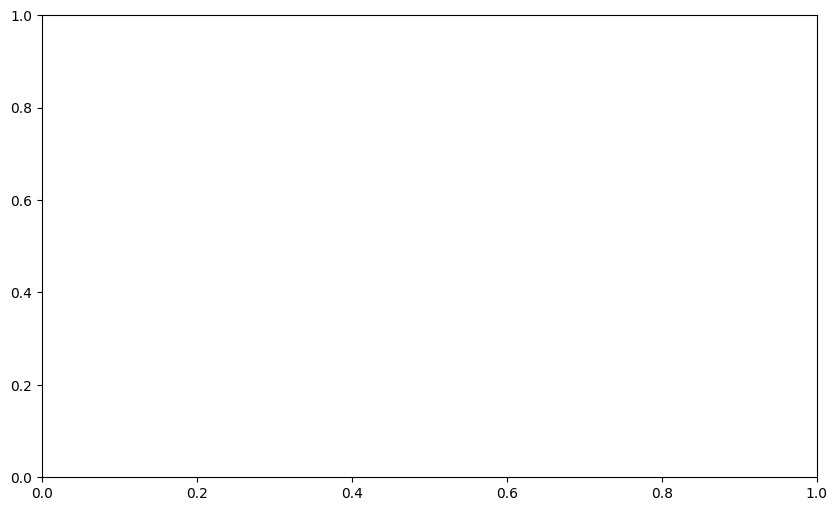

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import openpyxl
df=pd.read_csv("C:\\Users\\HP\\Downloads\\veridia.io\Resume.csv")
print("Dataset shape:", df.shape)
print(df.head())
display(df.info())
print('\nMissing values per column:')
print(df.isnull().sum())
dups = df.duplicated().sum()
print("Duplicates count:", dups)
df["word_count"] = df["Resume_str"].apply(lambda x: len(str(x).split()))
print('\n Resume Description')
word_stats = {
    "Average Words": df["word_count"].mean(),
    "Median Words": df["word_count"].median(),
    "Min Words": df["word_count"].min(),
    "Max Words": df["word_count"].max()
}
print("Word Count")
for k, v in word_stats.items():
    print(f"{k}: {v:.0f}")
df["char_count"] = df["Resume_str"].apply(lambda x: len(str(x)))
char_stats = {
    "Average Characters": df["char_count"].mean(),
    "Median Characters": df["char_count"].median(),
    "Min Characters": df["char_count"].min(),
    "Max Characters": df["char_count"].max()
}
print("\nCharacter Count")
for k, v in char_stats.items():
    print(f"{k}: {v:.0f}")
category_counts=df['Category'].value_counts()
plt.figure(figsize=(10,6))
plt.bar(list(category_counts.index),list(category_counts.values),color="skyblue", edgecolor="black")
plt.title("Resume Categories Distribution")
plt.xlabel("Category")
plt.ylabel("Resume Count")
plt.xticks(rotation=75)
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()
print('\n')
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
axes[0].hist(df["word_count"], bins=30, color="skyblue", edgecolor="black")
axes[0].set_title("Distribution of Resume Word Counts")
plt.tight_layout(pad=3.0)  
axes[0].grid(axis="y", linestyle="--", alpha=0.6)
axes[1].hist(df["char_count"], bins=30, color="salmon", edgecolor="black")
axes[1].set_title("Distribution of Resume Character Counts")
plt.tight_layout(pad=3.0)  
axes[1].grid(axis="y", linestyle="--", alpha=0.6)
plt.show()
plt.pie(category_counts.values,labels=category_counts.index,autopct='%1.f%%' )
plt.title("\nResume Categories - Pie Chart")
plt.show()

In [3]:
import pandas as pd
try:
    df = pd.read_csv("C:\\Users\\HP\\Downloads\\Resume_excel_ready.csv")
except FileNotFoundError:
    print("Error: The file was not found. Please check the file path.")
    exit()

category_counts = df['Category'].value_counts()

distinct_categories_df = category_counts.reset_index()

distinct_categories_df.columns = ['Distinct Category', 'Category Count']

print("The new table with distinct categories and their counts:")
print(distinct_categories_df)

distinct_categories_df.to_csv('distinct_categories_counts.csv', index=False)

print("\nThe table has been saved to 'distinct_categories_counts.csv'.")

The new table with distinct categories and their counts:
         Distinct Category  Category Count
0   INFORMATION-TECHNOLOGY             120
1     BUSINESS-DEVELOPMENT             120
2                 ADVOCATE             118
3                     CHEF             118
4              ENGINEERING             118
5               ACCOUNTANT             118
6                  FINANCE             118
7                  FITNESS             117
8                 AVIATION             117
9                    SALES             116
10                 BANKING             115
11              HEALTHCARE             115
12              CONSULTANT             115
13            CONSTRUCTION             112
14        PUBLIC-RELATIONS             111
15                      HR             110
16                DESIGNER             107
17                    ARTS             103
18                 TEACHER             102
19                 APPAREL              97
20           DIGITAL-MEDIA              